In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# We will be using the Bank dataset for Customer Churn Prediction. We need to check if the customer is still the customer of a particular bank or he/she has left the bank. This is a Binary Classification problem

## This is the file path to read the dataset:

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv

In [88]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [89]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is no missing values in the dataset.

In [91]:
df.duplicated().sum()

0

0 means there is no duplicate rows in the dataset

In [92]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Clearly, we can see that around 8K customers are still there and rest 2K customers have left the bank

In [93]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [94]:
# Removing the unwanted column for this task
df.drop(columns = ['RowNumber','CustomerId','Surname'],
        inplace = True)
# inplace = True means we need the changes to be permanent throughout this project
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [95]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [96]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [97]:
df.shape

(10000, 11)

In [98]:
# One Hot Encoding the 2 categorical columns in this dataset that is Geogarphy and Gender column.
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [99]:
# Applying 0 and 1 to False and True values respectively
df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
df.head(20)

/tmp/ipykernel_36/330580530.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


Now we can see that all the values are in numerical form that means we can proceed with this dataset before model building. 

We can see there are some numbers like 190857.79, 158684.81, etc which are very large as compared to 0 and 1. So, before training a __neural network__, we need to scale it. So, for that we need to train, test, split.

In [100]:
X = df.drop(columns=['Exited'])
y = df['Exited'] # Target variable storing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# 80% data will be trained and 20% data will be tested

In [101]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [102]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [103]:
X_train.shape

(8000, 11)

In [104]:
X_test.shape

(2000, 11)

In [105]:
y_train.shape

(8000,)

In [106]:
y_test.shape

(2000,)

In [109]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Creating an object of StandardScalar class
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
print(X_train_scaled)
print(X_train_scaled.shape)

[[-0.23082038 -0.94449979 -0.70174202 ...  1.71490137 -0.57273139
   0.91509065]
 [-0.25150912 -0.94449979 -0.35520275 ... -0.58312392 -0.57273139
  -1.09278791]
 [-0.3963303   0.77498705  0.33787579 ...  1.71490137 -0.57273139
  -1.09278791]
 ...
 [ 0.22433188  0.58393295  1.3774936  ... -0.58312392 -0.57273139
  -1.09278791]
 [ 0.13123255  0.01077067  1.03095433 ... -0.58312392 -0.57273139
  -1.09278791]
 [ 1.1656695   0.29735181  0.33787579 ...  1.71490137 -0.57273139
   0.91509065]]
(8000, 11)


Now we can see all the values are scaled to minimum values possible that are in decimal forms

Now, we are ready to apply keras

In [113]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense # Dense Layer

Now, we need to build models. In **keras** library, we can build 2 types of models - Sequential and Non-Sequential

In [114]:
model = Sequential() # Creating Object

# Now, we will add Input, Hidden, and Output layers. For this case, we will add 3 perceptrons or 3 layers
model.add(Dense(3, activation = 'sigmoid', input_dim = 11)) # Input and Hidden layer
model.add(Dense(1, activation = 'sigmoid')) # Output layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dense is the general layer in which all those 3 layers will be added in the form of a code. We will use sigmoid function in this case. Since, the hidden layer is connected with the input layer, we need to mention that how many inputs the hidden layer will recieve. So we are using input_dim = 11 because we have 11 input columns

In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

So here there are 11*3 weights + 3 biases + 3*1 weights + 1 bias = 33 + 3 + 3 + 1 = 40 Trainable parameters. So, when this Neural Network will be trained, it will find values of these 40 weights and biases for prediction. Now, we need to compile the model. In case of model compilation, we inform few things like which loss function to use, which optimizer to use for Gradient Descent.

In [119]:
# Since, this is a binary classification task, we will use binary cross entropy as the loss function
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam')

In [137]:
# Fitting the model
# This is the stage where our neural network gets trained
history = model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4257
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4295
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4090
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4160
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4020
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4138
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4162
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4108
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4134
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4008


Here, we can see that as the epochs are increasing the loss function is decreasing. And the 10th epoch is having the loss of 0.4008 which is the smallest among all. Now we can say that our **Neural Netwok** has been trained.

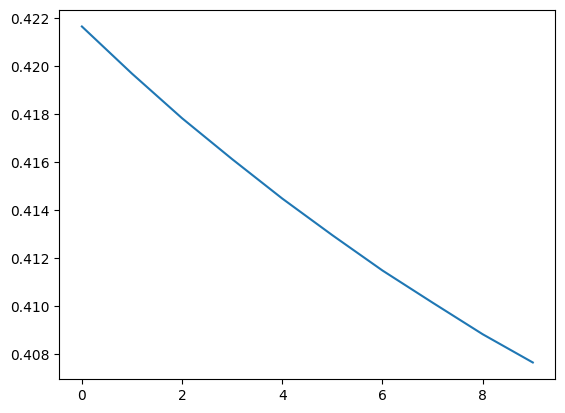

In [149]:
# Have imported matplotlib if you scroll down
plt.plot(history.history['loss'])

In [138]:
model.layers[0].get_weights()

[array([[ 0.16059819, -0.08350697, -0.17357624],
        [-0.02055453, -2.3246393 ,  2.1039135 ],
        [ 0.06272711,  0.03913394, -0.0043822 ],
        [ 0.36033434, -0.16694103,  0.5156355 ],
        [ 1.9408884 , -0.36156756,  0.38698593],
        [-0.02560517,  0.06689821, -0.04319502],
        [ 0.9196004 ,  0.31702045, -0.53324515],
        [-0.03128625, -0.04186961,  0.02002482],
        [-0.48484194, -0.3719397 ,  0.65474004],
        [ 0.07142206,  0.10562177,  0.32283795],
        [ 0.24177137,  0.26229903, -0.6020572 ]], dtype=float32),
 array([ 1.143933  ,  0.39804268, -0.32608435], dtype=float32)]

Now, you can see the output. From 0.16059819 to -0.6020572, there are 33 weights of the 1st layer and 3 biases of 1st layer.

In [139]:
model.layers[1].get_weights()

[array([[-1.4481097],
        [-1.6258721],
        [ 1.1227083]], dtype=float32),
 array([-0.27933118], dtype=float32)]

These are the 3 weights and 1 bias of 2nd layer. So, in total there are 40 trainable parameters.

Now, our model can predict as we have trained it.

In [142]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.14217088],
       [0.12181047],
       [0.13504659],
       ...,
       [0.04416617],
       [0.07834375],
       [0.46196204]], dtype=float32)

Now, we can see the model has given the 2000 predictions as output. But, these are given in decimals within the range 0 to 1. The reason why it is showing the decimal numbers from 0 to 1 is because of the sigmoid activation function that we have used as sigmoid gives the output in range 0 to 1. Now, we have to convert all these decimals numbers in the form of 0 and 1.

In [143]:
d = model.predict(X_test_scaled)
print(d.shape)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(2000, 1)


For converting all these values to 0 and 1, we will give a threshold 0.5. Means any decimal number > 0.5 means 1 (Customer will leave the bank) and if any decimal number < 0.5 means 0 (Customer will not leave the bank).

In [144]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [145]:
# Giving threshold values
np.where(y_log > 0.5, 1, 0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [146]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [147]:
# Need to check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# y_test is our actual data

0.826

You can see that this **NEURAL NETWORK** model is **82.6%** accurate.

Thing is we can play with the data to improve or increase the accuracy. For example to improve the accuracy, we can increase the number of epochs to 100, 1000, 10000, etc. Or, we can provide **RELU** activation function to get better results. Or, we can increase the nodes of hidden layers or increase the hidden layers itself to improve the accuracy of the results. But, we need to prevent **OVERFITTING** while doing all of these stuff to increase the accuracy.

In [140]:
import matplotlib.pyplot as plt

In [141]:
history.history

{'loss': [0.4216653108596802,
  0.41969767212867737,
  0.41783639788627625,
  0.4161287546157837,
  0.4144853353500366,
  0.4129563271999359,
  0.4114835262298584,
  0.4101426601409912,
  0.40882471203804016,
  0.4076470136642456]}

These are the 10 training losses of each epoch.

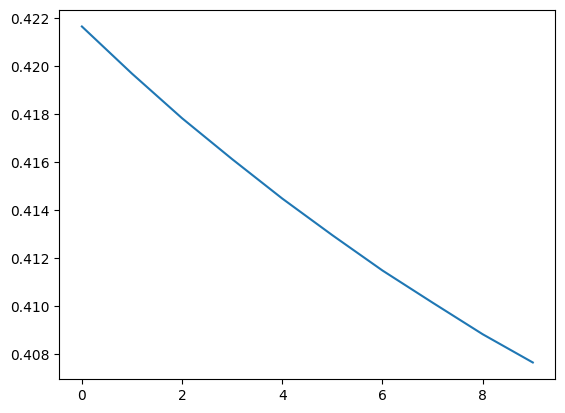

In [150]:
plt.plot(history.history['loss'])
plt.show()